## 타이타닉 데이터셋 도전

- 승객의 나이, 성별, 승객 등급, 승선 위치 같은 속성을 기반으로 하여 승객의 생존 여부를 예측하는 것이 목표

- [캐글](https://www.kaggle.com)의 [타이타닉 챌린지](https://www.kaggle.com/c/titanic)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 titanic_train.csv titanic_test.csv로 저장

### 1. 데이터 적재

In [216]:
import pandas as pd
train_data = pd.read_csv("datasets/titanic_train.csv")
test_data = pd.read_csv("datasets/titanic_test.csv")

### 2. 데이터 탐색

#### train_data 살펴보기

In [217]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Survived**: 타깃. 0은 생존하지 못한 것이고 1은 생존을 의미
* **Pclass**: 승객 등급. 1, 2, 3등석.
* **Name**, **Sex**, **Age**: 이름 그대로의 의미
* **SibSp**: 함께 탑승한 형제, 배우자의 수
* **Parch**: 함께 탑승한 자녀, 부모의 수
* **Ticket**: 티켓 아이디
* **Fare**: 티켓 요금 (파운드)
* **Cabin**: 객실 번호
* **Embarked**: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)


#### 누락 데이터 살펴보기

In [218]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- **Age**, **Cabin**, **Embarked** 속성의 일부가 null
- 특히 **Cabin**은 77%가 null. 일단 **Cabin**은 무시하고 나머지를 활용
- **Age**는 177개(19%)가 null이므로 이를 어떻게 처리할지 결정해야 함 - null을 중간 나이로 바꾸기 고려
- **Name**과 **Ticket** 속성은 숫자로 변환하는 것이 조금 까다로와서 지금은 무시

#### 통계치 살펴보기

In [219]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 38%만 **Survived**
* 평균 **Fare**는 32.20 파운드
* 평균 **Age**는 30보다 적음

#### Survived(머신러닝에서 타깃)가 0과 1로 이루어졌는지 확인

In [220]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 범주형(카테고리) 특성들을 확인

In [221]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [222]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [223]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [224]:
train_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

**Embarked** 특성은 승객이 탑승한 곳 : C=Cherbourg, Q=Queenstown, S=Southampton.

### 3. 전처리 파이프라인

* 특성과 레이블 분리

In [225]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import numpy as np

In [226]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [227]:
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"].copy()

In [228]:
X_train.shape

(891, 11)

* 특성을 조합해 또다른 특성(RelativesOnboard)을 만들기(가족과 탑승한 사람과 혼자 탑승한 사람)

In [229]:
#train_data['RelativesOnboard'] = train_data['SibSp'] + train_data['Parch']+1

In [230]:
# train_data["AgeBucket"] = train_data["Age"] // 15 * 15
# train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean() #나이를 15단위로 묶는다.

In [231]:
X_train.values[:, 5].shape

(891,)

* 나만의 변환기(Numpy)

In [232]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "SibSp", "Parch"
num_attirbs = ['SibSp', 'Parch', 'Fare']

# 열 인덱스
SibSp_ix, Parch_ix = [num_attirbs.index(c) for c in col_names]


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # *args 또는 **kargs 없음
        pass
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        RelativesOnboard = X[:, SibSp_ix] + X[:, Parch_ix] + 1
        return np.c_[X, RelativesOnboard]

* 범주형 파이프라인 구성

In [233]:
from sklearn.base import BaseEstimator, TransformerMixin
# train_data["AgeBucket"] = train_data["Age"] // 15 * 15

class AgetoCategory(BaseEstimator, TransformerMixin):
    def __init__(self): # *args 또는 **kargs 없음
        pass
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        AgeBucket = X // 15 * 15
        return np.c_[AgeBucket]


In [234]:
#1. 누락치 처리,
#2. 카테고리형,
#3. 더미변수(원한인코딩)
age_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('cat_encoder', OneHotEncoder(sparse=False))
    
])

In [235]:
# 1. 누락값을 most_frequent 로 대체
# 2. OneHot Encoding

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("age_cat", Age_to_Category()),
        ("attribs_adder",CombinedAttributesAdder())
        
])

* 수치형 파이프라인 구성

In [236]:
# 1. 누락값을 median 로 대체

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "median")),
        ("attribs_adder",CombinedAttributesAdder())
])

* 범주형 파이프라인 + 수치형 파이프라인

In [237]:
age_attribs = ['Age']
num_attirbs = ['SibSp', 'Parch', 'Fare']
cat_attribs = ['Pclass', 'Sex', 'Embarked']

In [238]:
preprocess_pipeline = ColumnTransformer([
        ('age', age_pipeline, age_attribs),
        ("num", num_pipeline, num_attirbs),
        ("cat", cat_pipeline, cat_attribs)
])

In [239]:
X_train_prepared = preprocess_pipeline.fit_transform(X_train)

TypeError: unsupported operand type(s) for //: 'str' and 'int'

In [190]:
X_train_prepared.shape

(891, 13)

* 전체 데이터 준비

## 모델 선택, 훈련, 평가(교차검증)

* 분류기 훈련

In [191]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

* Logistic Regression

In [27]:
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train_prepared, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [36]:
cross_val_score(log_reg, X_train_prepared, y_train, cv=3, scoring='accuracy') #사망자와 생존자비가 6대 4정도다.

array([0.7979798 , 0.78114478, 0.79461279])

In [38]:
y_predict_lr = cross_val_predict(log_reg, X_train_prepared, y_train, cv=3)

In [40]:
precision_score(y_train, y_predict_lr)

0.7516129032258064

In [42]:
recall_score(y_train, y_predict_lr)

0.6812865497076024

In [ ]:
(y_train, y_predict_lr)

* SVC

In [45]:
cvm_clf = SVC(random_state=42)
cvm_clf.fit(X_train_prepared, y_train)

SVC(random_state=42)

In [46]:
cross_val_score(cvm_clf, X_train_prepared, y_train, cv=3, scoring='accuracy')

array([0.63299663, 0.69023569, 0.68686869])

In [ ]:
y_predict_S = cross_val_predict(log_reg, X_train_prepared, y_train, cv=3)

* kNN

In [49]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_prepared, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict_lr = cross_val_predict(log_reg, X_train_prepared, y_train, cv=3)

In [50]:
cross_val_score(knn_clf, X_train_prepared, y_train, cv=3, scoring='accuracy')

array([0.67676768, 0.75084175, 0.7003367 ])

* SGD

In [51]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [53]:
cross_val_score(sgd_clf, X_train_prepared, y_train, cv=3, scoring='accuracy')

array([0.78451178, 0.77441077, 0.72053872])

In [56]:
y_predict_sgd = cross_val_predict(sgd_clf, X_train_prepared, y_train, cv=3)

In [57]:
precision_score(y_train, y_predict_sgd)

0.6702127659574468

In [58]:
recall_score(y_train, y_predict_sgd)

0.7368421052631579

In [59]:
f1_score(y_train, y_predict_sgd)

0.701949860724234

In [60]:
y_score_sgd = cross_val_predict(sgd_clf, X_train_prepared, y_train, cv=3, method='decision_function')

In [63]:
roc_auc_score(y_train, y_score_sgd) #precision 부터는 정답값 먼저 들어간다.

0.7915188700348321

* RandomForest

In [64]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(random_state=42)

In [65]:
cross_val_score(forest_clf, X_train_prepared, y_train, scoring='accuracy', cv = 3)

array([0.77441077, 0.81818182, 0.78451178])

In [67]:
y_predict_forest = cross_val_predict(forest_clf, X_train_prepared, y_train, cv = 3)

In [68]:
precision_score(y_train, y_predict_forest)

0.7371601208459214

In [69]:
recall_score(y_train, y_predict_forest)

0.7134502923976608

In [73]:
y_score_forest = cross_val_predict(forest_clf, X_train_prepared, y_train, cv = 3, method='predict_proba')

In [75]:
y_score_forest = y_score_forest[:, 1]

In [79]:
roc_auc_score(y_train, y_score_forest) # 성능이 가장 좋다

0.8396286709487745

* 분류기 평가

In [ ]:
* 정확도 / 정밀도 / 재현율 / F1 Score/ ROC 

* 파라미터 튜닝

In [103]:
param_grid = [
    {'n_estimators': [10, 50, 100, 200, 300, 400], 'max_features' : [2, 4, 6, 8, 10, 12, 14, 16, 18]}
]

In [104]:
grid_search = GridSearchCV(forest_clf, param_grid=param_grid, cv=30, scoring='accuracy', n_jobs=-1)

In [105]:
grid_search.fit(X_train_prepared, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81034483 0.80478927 0.80927203 0.81371648 0.81149425 0.81149425
 0.81816092 0.81720307 0.8137931  0.81712644 0.81494253 0.81264368
 0.81256705 0.81498084 0.82287356 0.82168582 0.81942529 0.81827586
 0.81042146 0.81494253 0.81942529 0.81934866 0.81827586 0.82045977
 0.80482759 0.81613027 0.81613027 0.81498084 0.81724138 0.81938697
 0.81157088 0.81835249 0.82057471 0.8205364  0.81716475 0.81716475
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=30, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                          'n_estimators': [10, 50, 100, 200, 300, 400]}],
             scoring='accuracy')

In [118]:
cross_val_score(grid_search, X_train_prepared, y_train, cv= 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81824561 0.81710526 0.82868421 0.82377193 0.8204386  0.82035088
 0.81675439 0.82517544 0.82710526 0.82535088 0.82535088 0.82192982
 0.81710526 0.82859649 0.82359649 0.8304386  0.83368421 0.82859649
 0.80666667 0.81184211 0.81692982 0.81868421 0.82035088 0.81692982
 0.82842105 0.82517544 0.82692982 0.82184211 0.82184211 0.82350877
 0.81833333 0.81684211 0.81684211 0.81684211 0.81850877 0.82017544
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


KeyboardInterrupt: 

In [119]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [120]:
grid_search.best_score_ #accuracy의 최고점

0.8228735632183909

In [121]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8103448275862069 {'max_features': 2, 'n_estimators': 10}
0.8047892720306513 {'max_features': 2, 'n_estimators': 50}
0.809272030651341 {'max_features': 2, 'n_estimators': 100}
0.8137164750957855 {'max_features': 2, 'n_estimators': 200}
0.8114942528735632 {'max_features': 2, 'n_estimators': 300}
0.8114942528735632 {'max_features': 2, 'n_estimators': 400}
0.8181609195402298 {'max_features': 4, 'n_estimators': 10}
0.8172030651340997 {'max_features': 4, 'n_estimators': 50}
0.8137931034482759 {'max_features': 4, 'n_estimators': 100}
0.8171264367816092 {'max_features': 4, 'n_estimators': 200}
0.8149425287356321 {'max_features': 4, 'n_estimators': 300}
0.8126436781609194 {'max_features': 4, 'n_estimators': 400}
0.8125670498084292 {'max_features': 6, 'n_estimators': 10}
0.8149808429118774 {'max_features': 6, 'n_estimators': 50}
0.8228735632183909 {'max_features': 6, 'n_estimators': 100}
0.8216858237547894 {'max_features': 6, 'n_estimators': 200}
0.8194252873563219 {'max_features': 6, 'n_estim

In [122]:
final_model = grid_search.best_estimator_ #여러 모델중 베스트 모델을 넣어준 것임.

* 최종 성능 평가

In [123]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = final_model.predict(X_test)

In [124]:
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

[Text(0.5, 1.0, 'y_pred')]

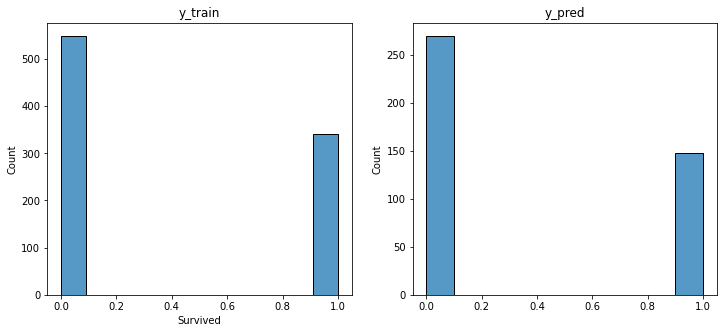

In [125]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.histplot(y_train, ax=ax1)
ax1.set(title='y_train')
sns.histplot(y_pred, ax=ax2)
ax2.set(title='y_pred')
#비율 자체가 괸장히 유사하다.

* 제출용 CSV 만들기

In [126]:
y_pred.shape

(418,)

In [241]:
rf = RandomForestClassifier(random_state=99)
rf_param = [{'n_estimators' : [50,100,200], 'max_depth' : [5,6,10]}]
rf_grid = GridSearchCV(rf, rf_param, cv=3, n_jobs=-1)
#### rf_grid.fit(x_train, y_train) ####

In [246]:
rf_grid.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=99), n_jobs=-1,
             param_grid=[{'max_depth': [5, 6, 10],
                          'n_estimators': [50, 100, 200]}])

In [255]:
rf_estimator = rf_grid.best_estimator_
rf_pred = rf_estimator.predict(X_test)

#print('roc auc : ', roc_auc_score(y_train, rf_pred))

In [256]:
len(rf_pred)

418

In [251]:
submission = pd.read_csv("datasets/gender_submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [257]:
submission["Survived"] = rf_pred
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [258]:
ver = 3 

submission.to_csv("datasets/ver_{0}_submission.csv".format(ver), index=False)